In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rahulburra12","key":"d3adf662ef8f5a52f7a0f42e78ea00a3"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# List your datasets to confirm access
!kaggle datasets list -m

ref                        title          size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------  ------------  -----  -------------------  -------------  ---------  ---------------  
rahulburra12/birdclef-zip  birdclef_zip  181MB  2024-05-31 11:58:33              0          0  0.125            


In [5]:
# Download the specific dataset
!kaggle datasets download -d ganiganesh888/audio-spectrograms

Dataset URL: https://www.kaggle.com/datasets/ganiganesh888/audio-spectrograms
License(s): unknown
 99% 3.39G/3.42G [00:15<00:00, 251MB/s]
100% 3.42G/3.42G [00:15<00:00, 229MB/s]


In [6]:
# Unzip the dataset
!unzip /content/audio-spectrograms.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_Spectrograms/pursun4/XC430250.png  
  inflating: train_Spectrograms/pursun4/XC444467.png  
  inflating: train_Spectrograms/pursun4/XC448609.png  
  inflating: train_Spectrograms/pursun4/XC448610.png  
  inflating: train_Spectrograms/pursun4/XC448623.png  
  inflating: train_Spectrograms/pursun4/XC452272.png  
  inflating: train_Spectrograms/pursun4/XC453304.png  
  inflating: train_Spectrograms/pursun4/XC453728.png  
  inflating: train_Spectrograms/pursun4/XC454341.png  
  inflating: train_Spectrograms/pursun4/XC467418.png  
  inflating: train_Spectrograms/pursun4/XC511045.png  
  inflating: train_Spectrograms/pursun4/XC512391.png  
  inflating: train_Spectrograms/pursun4/XC513476.png  
  inflating: train_Spectrograms/pursun4/XC513477.png  
  inflating: train_Spectrograms/pursun4/XC514814.png  
  inflating: train_Spectrograms/pursun4/XC514827.png  
  inflating: train_Spectrograms/pursun4/XC514852.png  
  inflating: t

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

In [8]:
species=['asbfly', 'ashdro1', 'ashpri1', 'ashwoo2', 'asikoe2', 'asiope1',
       'aspfly1', 'aspswi1', 'barfly1', 'barswa', 'bcnher', 'bkcbul1',
       'bkrfla1', 'bkskit1', 'bkwsti', 'bladro1', 'blaeag1', 'blakit1',
       'blhori1', 'blnmon1', 'blrwar1', 'bncwoo3', 'brakit1', 'brasta1',
       'brcful1', 'brfowl1', 'brnhao1', 'brnshr', 'brodro1', 'brwjac1',
       'brwowl1', 'btbeat1', 'bwfshr1', 'categr', 'chbeat1', 'cohcuc1',
       'comfla1', 'comgre', 'comior1', 'comkin1', 'commoo3', 'commyn',
       'compea', 'comros', 'comsan', 'comtai1', 'copbar1', 'crbsun2',
       'cregos1', 'crfbar1', 'crseag1', 'dafbab1', 'darter2', 'eaywag1',
       'emedov2', 'eucdov', 'eurbla2', 'eurcoo', 'forwag1', 'gargan',
       'gloibi', 'goflea1', 'graher1', 'grbeat1', 'grecou1', 'greegr',
       'grefla1', 'grehor1', 'grejun2', 'grenig1', 'grewar3', 'grnsan',
       'grnwar1', 'grtdro1', 'gryfra', 'grynig2', 'grywag', 'gybpri1',
       'gyhcaf1', 'heswoo1', 'hoopoe', 'houcro1', 'houspa', 'inbrob1',
       'indpit1', 'indrob1', 'indrol2', 'indtit1', 'ingori1', 'inpher1',
       'insbab1', 'insowl1', 'integr', 'isbduc1', 'jerbus2', 'junbab2',
       'junmyn1', 'junowl1', 'kenplo1', 'kerlau2', 'labcro1', 'laudov1',
       'lblwar1', 'lesyel1', 'lewduc1', 'lirplo', 'litegr', 'litgre1',
       'litspi1', 'litswi1', 'lobsun2', 'maghor2', 'malpar1', 'maltro1',
       'malwoo1', 'marsan', 'mawthr1', 'moipig1', 'nilfly2', 'niwpig1',
       'nutman', 'orihob2', 'oripip1', 'pabflo1', 'paisto1', 'piebus1',
       'piekin1', 'placuc3', 'plaflo1', 'plapri1', 'plhpar1', 'pomgrp2',
       'purher1', 'pursun3', 'pursun4', 'purswa3', 'putbab1', 'redspu1',
       'rerswa1', 'revbul', 'rewbul', 'rewlap1', 'rocpig', 'rorpar',
       'rossta2', 'rufbab3', 'ruftre2', 'rufwoo2', 'rutfly6', 'sbeowl1',
       'scamin3', 'shikra1', 'smamin1', 'sohmyn1', 'spepic1', 'spodov',
       'spoowl1', 'sqtbul1', 'stbkin1', 'sttwoo1', 'thbwar1', 'tibfly3',
       'tilwar1', 'vefnut1', 'vehpar1', 'wbbfly1', 'wemhar1', 'whbbul2',
       'whbsho3', 'whbtre1', 'whbwag1', 'whbwat1', 'whbwoo2', 'whcbar1',
       'whiter2', 'whrmun', 'whtkin2', 'woosan', 'wynlau1', 'yebbab1',
       'yebbul3', 'zitcis1']

In [9]:
import os
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))

    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    #fig.suptitle(T)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x = []
y = []

In [10]:
for index, specie in enumerate(species, start=0):
    images, labels = load_images_from_path(f'/content/train_Spectrograms/{specie}/', index)
    #show_images(images)
    x += images
    y += labels

In [11]:
pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 961.4 kB/s eta 0:00:00


In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from audiomentations import SpecCompose, SpecChannelShuffle, SpecFrequencyMask

# Assuming x and y are your dataset and labels
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

# Define the augmentation pipeline
augment = SpecCompose(
    [
        SpecChannelShuffle(p=0.5),
        SpecFrequencyMask(p=0.5),
    ]
)

# Apply augmentations to the training data
augmented_x_train = []
for spectrogram in x_train:
    augmented_spectrogram = augment(spectrogram)
    augmented_x_train.append(augmented_spectrogram)

augmented_x_train = np.array(augmented_x_train)

# Normalize the data
x_train_norm = augmented_x_train / 255
x_test_norm = np.array(x_test) / 255

# Encode the labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


In [13]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

# Initialize the EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Normalize the input data using EfficientNet's preprocessing function
x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

# Extract features using the EfficientNetB0 model
train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

230/230 [==============================] - 77s 335ms/step


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import AUC

# Define the model architecture
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(182, activation='softmax'))

# Compile the model with the ROC-AUC metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', AUC(name='roc_auc', multi_label=True)])

In [15]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=32, epochs=20)

Epoch 1/20
536/536 [==============================] - 147s 273ms/step - loss: 4.9513 - accuracy: 0.1628 - roc_auc: 0.6461 - val_loss: 3.5047 - val_accuracy: 0.2168 - val_roc_auc: 0.7080
Epoch 2/20
536/536 [==============================] - 141s 263ms/step - loss: 3.0890 - accuracy: 0.2882 - roc_auc: 0.7655 - val_loss: 3.2503 - val_accuracy: 0.2661 - val_roc_auc: 0.7350
Epoch 3/20
536/536 [==============================] - 142s 264ms/step - loss: 2.6152 - accuracy: 0.3659 - roc_auc: 0.8294 - val_loss: 3.2143 - val_accuracy: 0.2863 - val_roc_auc: 0.7725
Epoch 4/20
536/536 [==============================] - 143s 267ms/step - loss: 2.2931 - accuracy: 0.4235 - roc_auc: 0.8712 - val_loss: 3.1019 - val_accuracy: 0.3144 - val_roc_auc: 0.7829
Epoch 5/20
536/536 [==============================] - 142s 265ms/step - loss: 2.0097 - accuracy: 0.4838 - roc_auc: 0.8995 - val_loss: 3.2110 - val_accuracy: 0.3189 - val_roc_auc: 0.7706
Epoch 6/20
536/536 [==============================] - 141s 263ms/step 

In [16]:
# Save the model after training
model.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


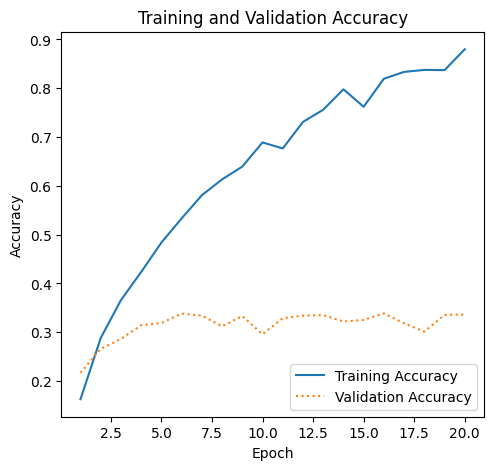

In [17]:
# Extract accuracy and ROC-AUC scores from the history object
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
roc_auc = hist.history['roc_auc']
val_roc_auc = hist.history['val_roc_auc']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

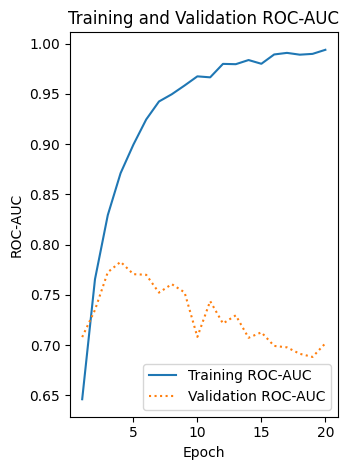

In [18]:
# Plot training and validation ROC-AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, roc_auc, '-', label='Training ROC-AUC')
plt.plot(epochs, val_roc_auc, ':', label='Validation ROC-AUC')
plt.title('Training and Validation ROC-AUC')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Single Prediction:

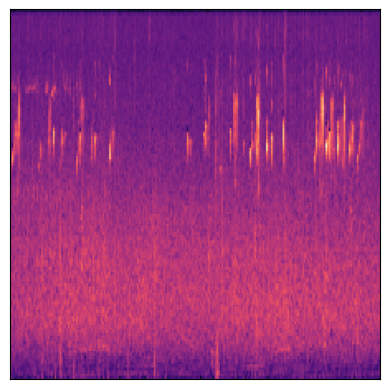

In [22]:
x = image.load_img(r"/content/train_Spectrograms/ashdro1/XC114598.png", target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [23]:
class_labels = ['asbfly', 'ashdro1', 'ashpri1', 'ashwoo2', 'asikoe2', 'asiope1',
       'aspfly1', 'aspswi1', 'barfly1', 'barswa', 'bcnher', 'bkcbul1',
       'bkrfla1', 'bkskit1', 'bkwsti', 'bladro1', 'blaeag1', 'blakit1',
       'blhori1', 'blnmon1', 'blrwar1', 'bncwoo3', 'brakit1', 'brasta1',
       'brcful1', 'brfowl1', 'brnhao1', 'brnshr', 'brodro1', 'brwjac1',
       'brwowl1', 'btbeat1', 'bwfshr1', 'categr', 'chbeat1', 'cohcuc1',
       'comfla1', 'comgre', 'comior1', 'comkin1', 'commoo3', 'commyn',
       'compea', 'comros', 'comsan', 'comtai1', 'copbar1', 'crbsun2',
       'cregos1', 'crfbar1', 'crseag1', 'dafbab1', 'darter2', 'eaywag1',
       'emedov2', 'eucdov', 'eurbla2', 'eurcoo', 'forwag1', 'gargan',
       'gloibi', 'goflea1', 'graher1', 'grbeat1', 'grecou1', 'greegr',
       'grefla1', 'grehor1', 'grejun2', 'grenig1', 'grewar3', 'grnsan',
       'grnwar1', 'grtdro1', 'gryfra', 'grynig2', 'grywag', 'gybpri1',
       'gyhcaf1', 'heswoo1', 'hoopoe', 'houcro1', 'houspa', 'inbrob1',
       'indpit1', 'indrob1', 'indrol2', 'indtit1', 'ingori1', 'inpher1',
       'insbab1', 'insowl1', 'integr', 'isbduc1', 'jerbus2', 'junbab2',
       'junmyn1', 'junowl1', 'kenplo1', 'kerlau2', 'labcro1', 'laudov1',
       'lblwar1', 'lesyel1', 'lewduc1', 'lirplo', 'litegr', 'litgre1',
       'litspi1', 'litswi1', 'lobsun2', 'maghor2', 'malpar1', 'maltro1',
       'malwoo1', 'marsan', 'mawthr1', 'moipig1', 'nilfly2', 'niwpig1',
       'nutman', 'orihob2', 'oripip1', 'pabflo1', 'paisto1', 'piebus1',
       'piekin1', 'placuc3', 'plaflo1', 'plapri1', 'plhpar1', 'pomgrp2',
       'purher1', 'pursun3', 'pursun4', 'purswa3', 'putbab1', 'redspu1',
       'rerswa1', 'revbul', 'rewbul', 'rewlap1', 'rocpig', 'rorpar',
       'rossta2', 'rufbab3', 'ruftre2', 'rufwoo2', 'rutfly6', 'sbeowl1',
       'scamin3', 'shikra1', 'smamin1', 'sohmyn1', 'spepic1', 'spodov',
       'spoowl1', 'sqtbul1', 'stbkin1', 'sttwoo1', 'thbwar1', 'tibfly3',
       'tilwar1', 'vefnut1', 'vehpar1', 'wbbfly1', 'wemhar1', 'whbbul2',
       'whbsho3', 'whbtre1', 'whbwag1', 'whbwat1', 'whbwoo2', 'whcbar1',
       'whiter2', 'whrmun', 'whtkin2', 'woosan', 'wynlau1', 'yebbab1',
       'yebbul3', 'zitcis1']

In [24]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 [==============================] - 0s 57ms/step
asbfly: 1.9467590313773132e-14
ashdro1: 0.7759326100349426
ashpri1: 6.548824815766352e-10
ashwoo2: 5.675135383853558e-08
asikoe2: 1.1274729594390465e-08
asiope1: 2.5782010629834268e-25
aspfly1: 6.19467855917516e-13
aspswi1: 3.9283785507318245e-14
barfly1: 1.3318039546985922e-19
barswa: 3.865681605930149e-07
bcnher: 4.944561687175719e-12
bkcbul1: 1.964962621059385e-06
bkrfla1: 1.3517412511885317e-17
bkskit1: 2.8796854678603268e-08
bkwsti: 1.680799215364459e-07
bladro1: 0.11044228821992874
blaeag1: 1.5529128005210835e-13
blakit1: 1.2960871345057967e-06
blhori1: 9.760647151635382e-13
blnmon1: 3.879786527249962e-05
blrwar1: 0.0006637311307713389
bncwoo3: 1.9015022195700837e-11
brakit1: 4.572278089454672e-14
brasta1: 8.936128637060392e-08
brcful1: 0.00012883258750662208
brfowl1: 1.1268013122874953e-17
brnhao1: 4.308003481686063e-16
brnshr: 7.890037068136735e-07
brodro1: 0.022490134462714195
brwjac1: 9.814672945890335e-13
brwowl1: 1.2018422

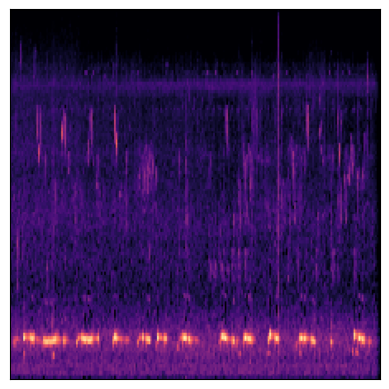

In [28]:
x = image.load_img(r"/content/train_Spectrograms/grecou1/XC126408.png", target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [29]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

# Filter predictions with confidence above 50% and print them
threshold = 0.5
confident_predictions = [(class_labels[i], predictions[0][i]) for i in range(len(class_labels)) if predictions[0][i] > threshold]

# Print the results without scientific notation
for label, confidence in confident_predictions:
    print(f'{label}: {confidence:.4f}')


1/1 [==============================] - 0s 57ms/step
grecou1: 0.9019


1/1 [==============================] - 0s 56ms/step
woosan: 0.9997


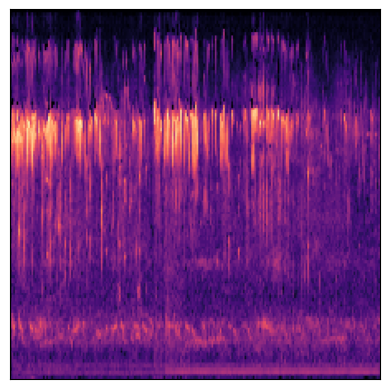

In [31]:
x = image.load_img(r"/content/train_Spectrograms/woosan/XC110316.png", target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

# Filter predictions with confidence above 50% and print them
threshold = 0.5
confident_predictions = [(class_labels[i], predictions[0][i]) for i in range(len(class_labels)) if predictions[0][i] > threshold]

# Print the results without scientific notation
for label, confidence in confident_predictions:
    print(f'{label}: {confidence:.4f}')

1/1 [==============================] - 0s 56ms/step
woosan: 0.9969


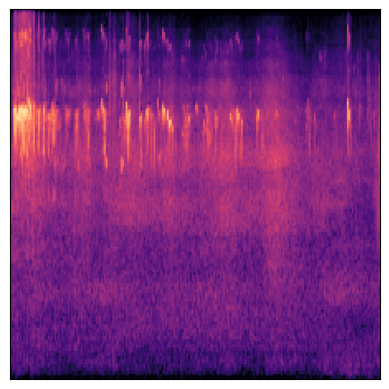

In [32]:
x = image.load_img(r"/content/train_Spectrograms/woosan/XC799991.png", target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

# Filter predictions with confidence above 50% and print them
threshold = 0.5
confident_predictions = [(class_labels[i], predictions[0][i]) for i in range(len(class_labels)) if predictions[0][i] > threshold]

# Print the results without scientific notation
for label, confidence in confident_predictions:
    print(f'{label}: {confidence:.4f}')